In [1]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
with open('eval_evolution.json', 'r') as file:
    df_eval = pd.read_json(file)

In [13]:
df_eval

,minimal-catboost,experimental-features-catboost,dayless-catboost,dayless-catboost-transformed
DataPrepSteps,[PADRONIZING START_STATION_ID DATA TYPE (VERY ...,"[DROPPING DUPLICATES, DROPPING NULLS, PADRONIZ...","[DROPPING DUPLICATES, DROPPING NULLS, PADRONIZ...","[DROPPING DUPLICATES, DROPPING NULLS, PADRONIZ..."
Features,"{'categorical_features': ['start_station_id', ...","{'categorical_features': ['start_station_id', ...","{'categorical_features': ['start_station_id', ...","{'categorical_features': ['start_station_id', ..."
Architecture,"{'preprocess': 'True', 'model': 'catboost', 'i...","{'preprocess': 'True', 'model': 'catboost', 'i...","{'preprocess': 'True', 'model': 'catboost', 'i...","{'preprocess': 'True', 'model': 'catboost', 't..."
Evaluation,"{'MAE': 1.4336, 'MSE': 5.6226, 'RMSE': 2.371, ...","{'MAE': 1.1487, 'MSE': 3.6575, 'RMSE': 1.9123,...","{'MAE': 2.4997, 'MSE': 19.087, 'RMSE': 4.3656,...","{'MAE': 2.6134, 'MSE': 28.5467, 'RMSE': 5.337,..."


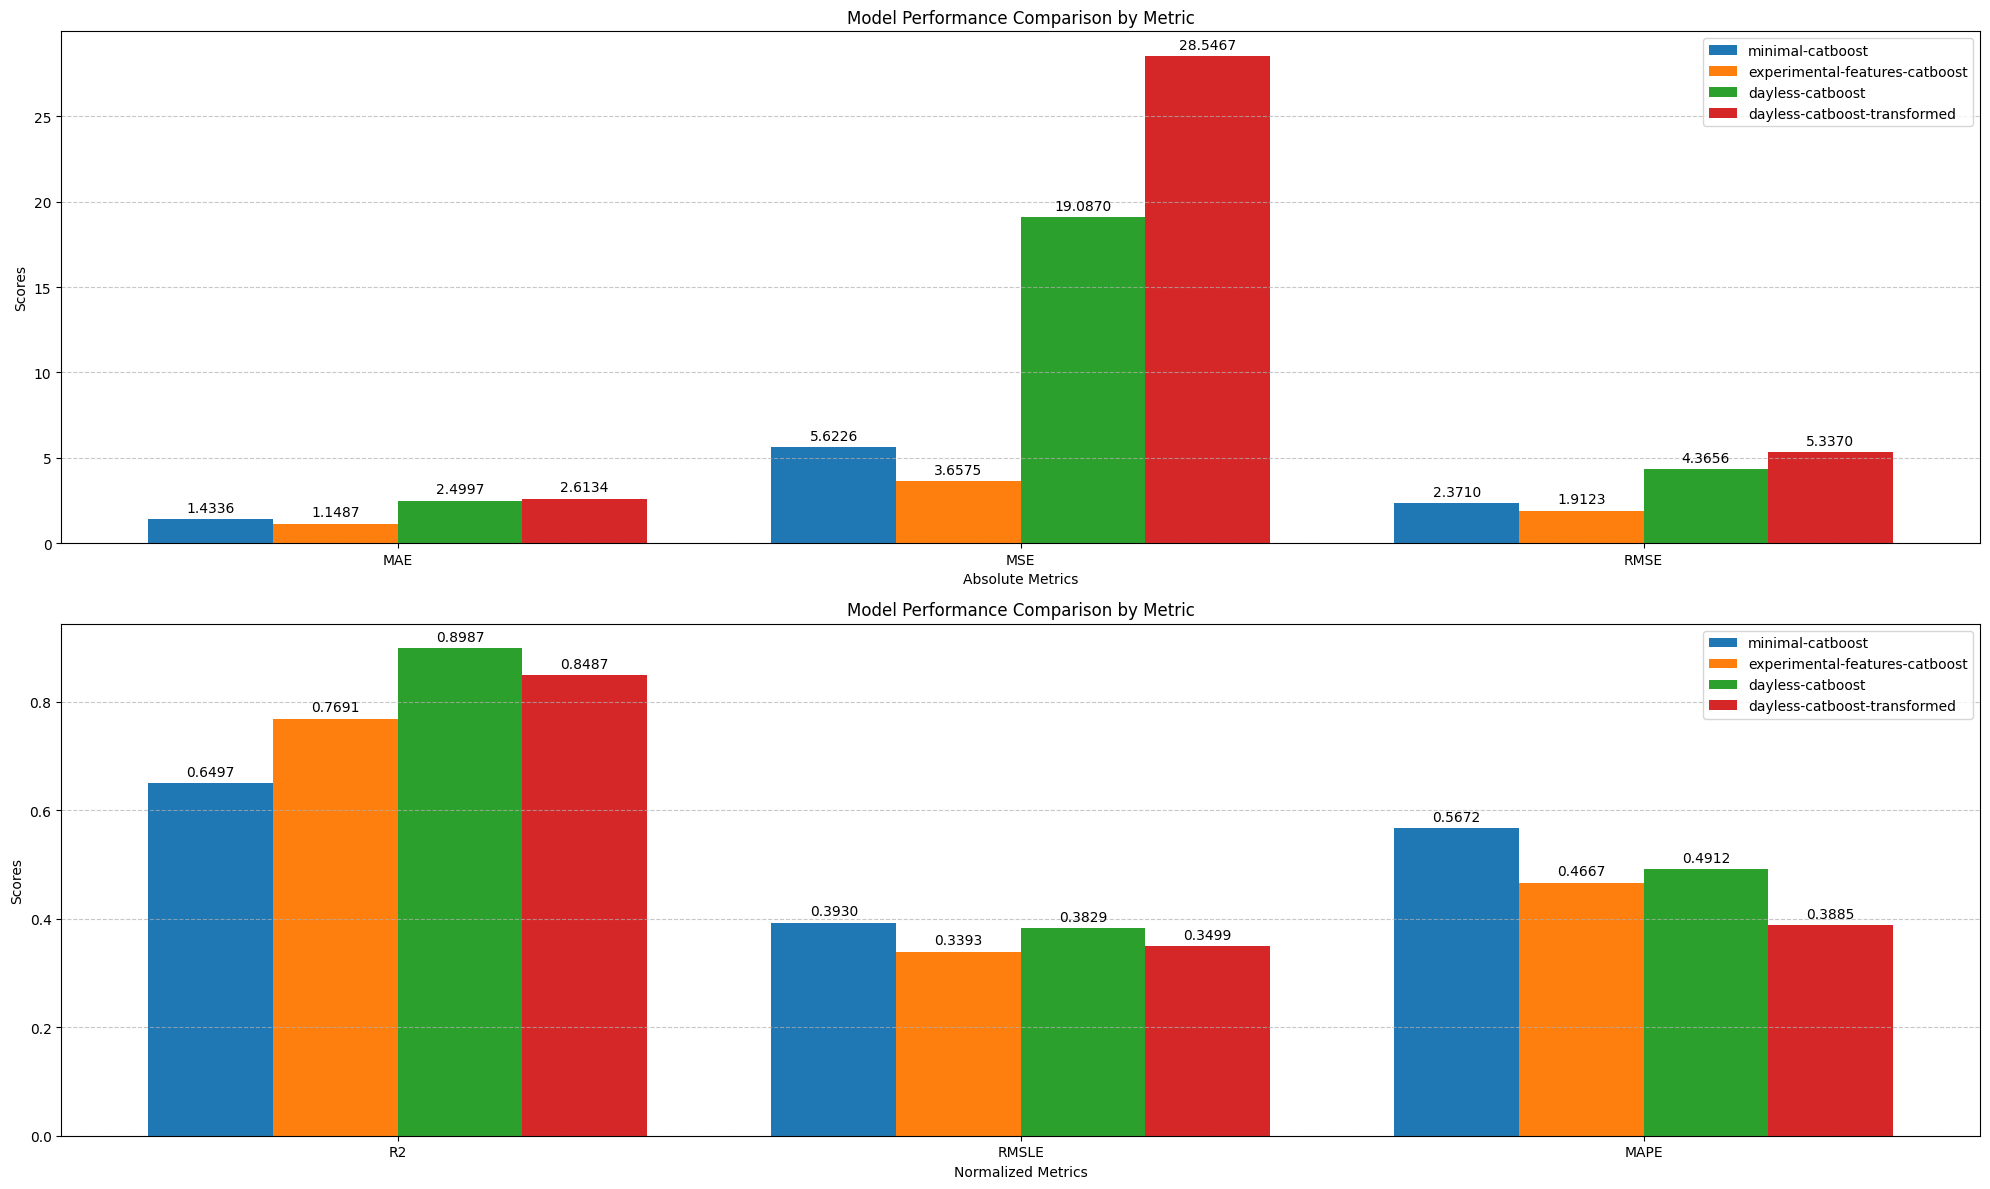

In [17]:
series_names = list(df_eval.keys())
n_series = len(series_names)

absolute_metric_names = ["MAE", "MSE", "RMSE"]
normalized_metric_names = ["R2", "RMSLE", "MAPE"]

n_metrics = 3

bar_width = 0.20  # Width of a single bar
index = np.arange(n_metrics) # The x locations for the groups
fig, ax = plt.subplots(2,1, figsize=(20, 12))

values = []
for series_name in series_names:
    series_values = [df_eval[series_name]['Evaluation'][metric] for metric in absolute_metric_names]
    values.append(series_values)
for i, series_name in enumerate(series_names):
        position = index + (i - (n_series - 1) / 2) * bar_width
        rects = ax[0].bar(position, values[i], bar_width, label=series_name)
        for rect in rects:
            height = rect.get_height()
            ax[0].annotate(f'{height:.4f}',  # Format to 4 decimal places
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

values = []
for series_name in series_names:
    series_values = [df_eval[series_name]['Evaluation'][metric] for metric in normalized_metric_names]
    values.append(series_values)            
for i, series_name in enumerate(series_names):
        position = index + (i - (n_series - 1) / 2) * bar_width
        rects = ax[1].bar(position, values[i], bar_width, label=series_name)
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(f'{height:.4f}',  # Format to 4 decimal places
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

ax[0].set_xlabel('Absolute Metrics')
ax[0].set_ylabel('Scores')
ax[0].set_title('Model Performance Comparison by Metric')
ax[0].set_xticks(index)
ax[0].set_xticklabels(absolute_metric_names)
ax[0].legend()
ax[0].yaxis.grid(True, linestyle='--', alpha=0.7)

ax[1].set_xlabel('Normalized Metrics')
ax[1].set_ylabel('Scores')
ax[1].set_title('Model Performance Comparison by Metric')
ax[1].set_xticks(index)
ax[1].set_xticklabels(normalized_metric_names)
ax[1].legend()
ax[1].yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()